# Анализ A/B-теста

____________________

##### Часть 1. Приоритизация гипотез
* [Применение фреймворка ICE для приоритизации гипотез](#section1)
* [Применение фреймворка RICE для приоритизации гипотез](#section2)    

##### Часть 2. Анализ A/B-теста 
* [Информация о данных, подготовка данных к анализу](#section3)    
* [График кумулятивной выручки по группам](#section4)
* [График кумулятивного среднего чека по группам](#section5)
* [График относительного изменения кумулятивного среднего чека группы B к группе A](#section6)
* [График кумулятивной конверсии по группам](#section7)
* [График относительного изменения кумулятивной конверсии группы B к группе A](#section8)
* [Точечный график количества заказов по пользователям](#section9)
* [Подсчет 95-й и 99-й перцентилей количества заказов на пользователя](#section10)
* [Точечный график стоимостей заказов](#section11)
* [Подсчет 95-й и 99-й перцентилей стоимости заказов](#section12)
* [Подсчет статистической значимости различий в конверсии между группами по «сырым» данным](#section13)
* [Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным](#section14)
* [Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным](#section15)
* [Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным](#section16)

##### Решение
* [Вывод и рекомендации маркетологам](#section17)

#### Описание проекта

Вместе с отделом маркетинга для увеличения выручки интернет-магазина необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Часть 1. Приоритизация гипотез

In [1]:
# Иммпортируем библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', 500) # все столбцы

In [4]:
pd.set_option('display.max_colwidth', 500) # все строки

In [5]:
#Смотрим данные о 9 гипотезах по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.columns = hypothesis.columns.str.lower() # названия столбцов к нижнему регистру
hypothesis['number'] = hypothesis.index+1 # добавляем номер гипотезы
hypothesis

,hypothesis,reach,impact,confidence,efforts,number
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,5
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,6
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,7
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,8
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,9


<a id='section1'></a>

In [6]:
# Применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE', 'number']].sort_values(by='ICE', ascending=False).round()

,hypothesis,ICE,number
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0,9
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0,1
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0,8
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,7
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,3
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0,6
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,5


<a id='section2'></a>

In [7]:
# Применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE', 'number']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE,number
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,3
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,1
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,7
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,9
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,4
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,6
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,5


По итогу приоритезации гипотез фреймворком ICE получили наиболее важные гипотезы для проверки А/В теста под номерами: 9, 1, 8, 7. При применении RICE вместо ICE изменилась приоритизация гипотез, так как оказал влияние параметр reach, который показывает количество пользователей, которых затронет изменение. Наиболее перспективными в данном случае стали гипотезы 8, 3, 1, 7. Рекомендация проверить гипотезы под номерами 8, 3, 1, 7, так как они имеют наибольшее влияние и больший охват.

## Часть 2. Анализ A/B-теста

<a id='section3'></a>

In [8]:
# transactionId — идентификатор заказа;
# visitorId — идентификатор пользователя, совершившего заказ;
# date — дата, когда был совершён заказ;
# revenue — выручка заказа;
# group — группа A/B-теста, в которую попал заказ.
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
# проверяем, сколько групп участвовало в тесте
orders['group'].unique() 

array(['B', 'A'], dtype=object)

In [10]:
#Смотрим информацию о данных и проверяем дубликаты
orders.info()
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


0

In [11]:
# Переводим дату в формат даты
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
# date — дата;
# group — группа A/B-теста;
# visitors — количество пользователей в указанную дату в указанной группе A/B-теста
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
# проверяем, сколько групп участвовало в тесте
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [14]:
#Смотрим информацию о данных и проверяем дубликаты
visitors.info()
visitors.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


0

In [15]:
# Переводим дату в формат даты
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Вывод
Загружены данные о пользователях и заказах в переменные. Изучена информация о данных, дубликаты отсуствуют. В таблице с пользователями значения с датой приведены к типу даты. 

In [16]:
# Найдем количество заказов и выручку в выбранную дату в группе A
ordersA = orders.query('group =="A"')\
.groupby('date', as_index=False)\
.agg({'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'})
ordersA.columns = ['date', 'ordersPerDateA', 'buyers', 'revenuePerDateA']

# И накопленные значения количества заказов и выручки в выбранную дату в группе A
ordersA['ordersCummulativeA'] = ordersA['ordersPerDateA'].cumsum()
ordersA['revenueCummulativeA'] = ordersA['revenuePerDateA'].cumsum()
ordersA.head()        

,date,ordersPerDateA,buyers,revenuePerDateA,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,20,148579,24,148579
1,2019-08-02,20,19,93822,44,242401
2,2019-08-03,24,24,112473,68,354874
3,2019-08-04,16,15,70825,84,425699
4,2019-08-05,25,25,124218,109,549917


In [17]:
# Найдем количество заказов и выручку в выбранную дату в группе B
ordersB = orders.query('group =="B"')\
.groupby('date', as_index=False)\
.agg({'transactionId':'nunique', 'revenue':'sum'})
ordersB.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# И накопленные значения количества заказов и выручки в выбранную дату в группе B
ordersB['ordersCummulativeB'] = ordersB['ordersPerDateB'].cumsum()
ordersB['revenueCummulativeB'] = ordersB['revenuePerDateB'].cumsum()
ordersB.head()         

,date,ordersPerDateB,revenuePerDateB,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217,21,101217
1,2019-08-02,24,165531,45,266748
2,2019-08-03,16,114248,61,380996
3,2019-08-04,17,108571,78,489567
4,2019-08-05,23,92428,101,581995


In [18]:
# Найдем количество пользователей в выбранную дату в группе A
visitorsA = visitors.query('group =="A"')[['date', 'visitors']]
visitorsA.columns = ['date', 'visitorsPerDateA']
# И накопленное количество пользователей в выбранную дату в группе A
visitorsA['visitorsCummulativeA'] = visitorsA['visitorsPerDateA'].cumsum()
visitorsA.head()     

,date,visitorsPerDateA,visitorsCummulativeA
0,2019-08-01,719,719
1,2019-08-02,619,1338
2,2019-08-03,507,1845
3,2019-08-04,717,2562
4,2019-08-05,756,3318


In [19]:
# Найдем количество пользователей в выбранную дату в группе В
visitorsB = visitors.query('group =="B"')[['date', 'visitors']]
visitorsB.columns = ['date', 'visitorsPerDateB']
# И накопленное количество пользователей в выбранную дату в группе В
visitorsB['visitorsCummulativeB'] = visitorsB['visitorsPerDateB'].cumsum()
visitorsB.head()

,date,visitorsPerDateB,visitorsCummulativeB
31,2019-08-01,713,713
32,2019-08-02,581,1294
33,2019-08-03,509,1803
34,2019-08-04,770,2573
35,2019-08-05,707,3280


In [20]:
# Объединим все данные по дате заказа
data = ordersA.merge(ordersB, on='date').merge(visitorsA, on='date').merge(visitorsB, on='date')
data.head()

,date,ordersPerDateA,buyers,revenuePerDateA,ordersCummulativeA,revenueCummulativeA,ordersPerDateB,revenuePerDateB,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsCummulativeA,visitorsPerDateB,visitorsCummulativeB
0,2019-08-01,24,20,148579,24,148579,21,101217,21,101217,719,719,713,713
1,2019-08-02,20,19,93822,44,242401,24,165531,45,266748,619,1338,581,1294
2,2019-08-03,24,24,112473,68,354874,16,114248,61,380996,507,1845,509,1803
3,2019-08-04,16,15,70825,84,425699,17,108571,78,489567,717,2562,770,2573
4,2019-08-05,25,25,124218,109,549917,23,92428,101,581995,756,3318,707,3280


##### График кумулятивной выручки по группам <a id='section4'></a>

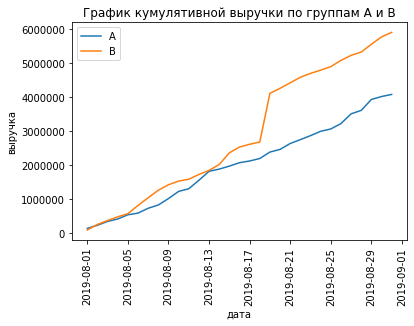

In [21]:
# Строим график выручки группы А
plt.plot(data['date'], data['revenueCummulativeA'], label='A')

# Строим график выручки группы B
plt.plot(data['date'], data['revenueCummulativeB'], label='B')

plt.xticks(rotation=90)
plt.title('График кумулятивной выручки по группам А и В')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.legend();

Выручка группы В в конце теста расет сильнее. Возможно появление аномальных значений.

##### График кумулятивного среднего чека по группам <a id='section5'></a>

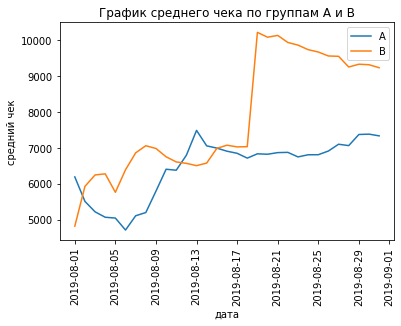

In [22]:
# Строим график среднего чека группы А, разделив кумулятивную выручку на кумулятивное число заказов
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')

# Строим график среднего чека группы B, разделив кумулятивную выручку на кумулятивное число заказов 
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')

plt.xticks(rotation=90)
plt.title('График среднего чека по группам А и В')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.legend();

Средний чек в 20х числах группы В резко увеличился, возможно был какой-то крупный заказ и скорее всего имеем дело с выбросом.

##### График относительного изменения кумулятивного среднего чека группы B к группе A <a id='section6'></a>

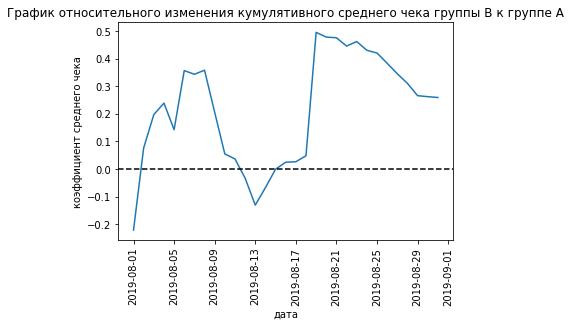

In [23]:
# Строим график среднего чека группы А, разделив кумулятивную выручку на кумулятивное число заказов
plt.plot(data['date'],\
(data['revenueCummulativeB']/data['ordersCummulativeB']) / (data['revenueCummulativeA']/data['ordersCummulativeA']) - 1)

plt.axhline(color='black', linestyle='--')
plt.xticks(rotation=90)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.ylabel('коэффициент среднего чека');

Результаты теста менялись в несколько дат. Видимо тогда были совершены аномальные заказы.

##### График кумулятивной конверсии по группам <a id='section7'></a>

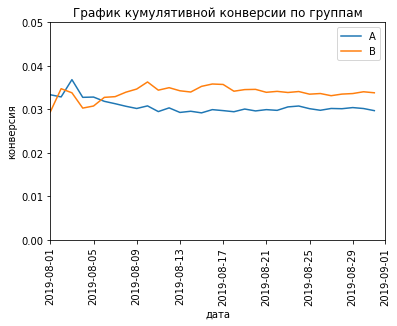

In [24]:
# Найдем кумулятивную конверсию для групп, разделив кумулятивное количество заказов на кумулятивное количество посетителей
data['conversionCummulativeA'] = data['ordersCummulativeA'] / data['visitorsCummulativeA']
data['conversionCummulativeB'] = data['ordersCummulativeB'] / data['visitorsCummulativeB']

# И построим график кумулятивной конверсии по группам

plt.plot(data['date'], data['conversionCummulativeA'], label='A')
plt.plot(data['date'], data['conversionCummulativeB'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('дата')
plt.ylabel('конверсия')
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05]);


К концу теста конверсии групп зафиксировались. Конверсия группы В выше группы А.

##### График относительного изменения кумулятивной конверсии группы B к группе A <a id='section8'></a>

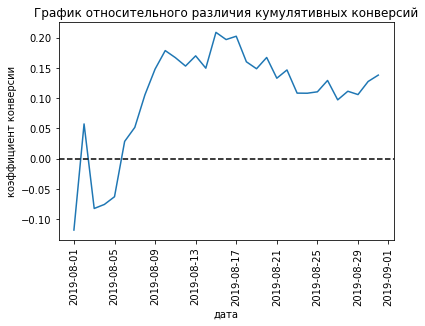

In [25]:
# Построим график относительного различия кумулятивных конверсий

plt.plot(data['date'], data['conversionCummulativeB'] / data['conversionCummulativeA'] - 1)
plt.xticks(rotation=90)
plt.title('График относительного различия кумулятивных конверсий')
plt.xlabel('дата')
plt.ylabel('коэффициент конверсии')
plt.axhline(color='black', linestyle='--');

В начале теста группа B проигрывала группе A, затем значительно вырвалась вперёд.

##### Точечный график количества заказов по пользователям <a id='section9'></a>

In [26]:
orders.groupby('visitorId')['transactionId'].nunique().sum() - orders.groupby('visitorId')['transactionId'].count().sum()

0

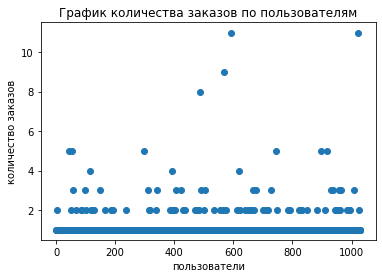

In [27]:
# Строим распределение заказов по пользователям 
ordersByUsers = orders.groupby('visitorId')['transactionId'].nunique().reset_index()
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.title('График количества заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('количество заказов');
#orders.groupby('visitorId', as_index=False)['transactionId']\
#.nunique().reset_index().plot(kind='scatter', x='index', y='transactionId');

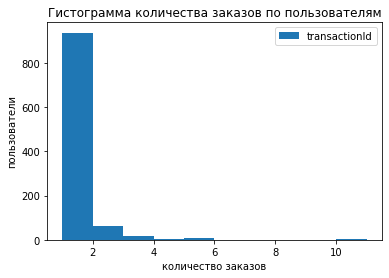

In [28]:
# Строим гистограмму заказов по пользователям 
orders.groupby('visitorId', as_index=False)['transactionId']\
.nunique().reset_index().plot(kind='hist', x='index', y='transactionId')
plt.title('Гистограмма количества заказов по пользователям')
plt.ylabel('пользователи')
plt.xlabel('количество заказов');

Большинство пользователей сделали один заказ. Также некоторое количество пользователей сделали два заказа. Есть аномальные значения, такие как 8 и 10 заказов.

##### Подсчет 95-й и 99-й перцентилей количества заказов на пользователя <a id='section10'></a>

In [29]:
#Считаем перцентили
print(np.percentile(ordersByUsers['transactionId'], [95, 99]))

[2. 4.]


Не больше 5% пользователей совершили 2 заказа и не больше 1% - 4 заказа. Ограничем количество заказов пользователей меньше или равно 2.

##### Точечный график стоимостей заказов <a id='section11'></a>

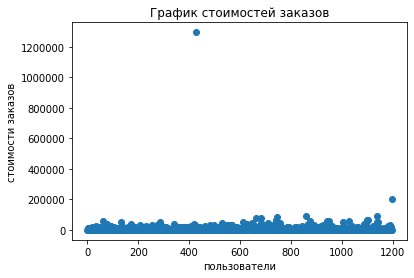

In [48]:
# Строим распределение стоимостей заказов 
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('пользователи')
plt.ylabel('стоимости заказов');

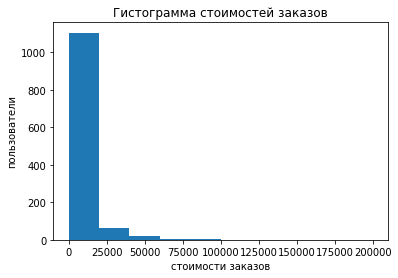

In [50]:
# Строим гистограмму стоимостей заказов 
orders['revenue'].plot(kind='hist', range=(0, 200000))
plt.title('Гистограмма стоимостей заказов')
plt.ylabel('пользователи')
plt.xlabel('стоимости заказов');

Большинство пользователей сделали заказ на сумму менее 25000. Но есть и аномальные значение, 100 тыс и больше 1.2 млн.

#####  Подсчет 95-й и 99-й перцентилей стоимости заказов <a id='section12'></a>

In [51]:
#Считаем перцентили
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не больше 5% пользователей совершили заказы на сумму дороже 28000 и не больше 1% - более 58233,2. Ограничем количество заказов пользователей меньше или равно 28 тысяч.

##### Подсчет статистической значимости различий в конверсии между группами по «сырым» данным <a id='section13'></a>

In [33]:
# Находим количество заказов для каждого пользователя группы А
ordersByUsersA = orders.query('group == "A"').groupby('visitorId')['transactionId'].nunique().reset_index()
ordersByUsersA.head()

,visitorId,transactionId
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [34]:
# Находим количество заказов для каждого пользователя группы В
ordersByUsersB = orders.query('group == "B"').groupby('visitorId')['transactionId'].nunique().reset_index()
ordersByUsersB.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [35]:
# Создаем список количества заказов пользователей, учитывая нулевые заказы, 
# которые находим вычитанием количества заказов из количества всех пользователей
# Для группы А
sampleA = pd.concat([ordersByUsersA['transactionId'],\
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='orders')],axis=0)
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Length: 18736, dtype: int64

In [36]:
# Создаем список количества заказов пользователей, учитывая нулевые заказы, 
# которые находим вычитанием количества заказов из количества всех пользователей
# Для группы B
sampleB = pd.concat([ordersByUsersB['transactionId'],\
    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='orders')],axis=0)
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Length: 18916, dtype: int64

In [37]:
# Проверим, есть ли статистически значимые различия в конверсии между группами по "сырым" данным
# Находим значение pvalue
st.mannwhitneyu(sampleA, sampleB)[1]

0.008396177528376304

In [38]:
# Выведем относительный прирост конверсии группы B
sampleB.mean() / sampleA.mean() - 1

0.13807884655320146

Получили pvalue > 5%, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем. Относительный прирост группы В равен 13,8 %.

##### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным <a id='section14'></a>

In [39]:
# Проверим, есть ли статистически значимые различия в среднем чеке между группами по "сырым" данным
# Находим значение pvalue
st.mannwhitneyu(orders.query('group =="A"')['revenue'], orders.query('group =="B"')['revenue'])[1]

0.3646454927716229

In [40]:
# Выведем относительный прирост среднего чека группы B
orders.query('group =="B"')['revenue'].mean() / orders.query('group =="A"')['revenue'].mean() - 1

0.2587136699126005

Получили pvalue > 5%, значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. Относительный прирост группы В равен 25,9%.

##### Статистическая значимость различий в конверсии между группами по «очищенным» данным <a id='section15'></a>

In [41]:
# Аномальные значения ранее определили так: заказы > 2, сумма покупки > 28000
usersWithManyOrders = ordersByUsers.query('transactionId > 2')['visitorId']
usersWithExpensiveOrders = orders.query('revenue > 28000')['visitorId']

# Объединяем и находис список пользователей с аномальным количеством заказов и суммой покупки
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers

1099     148427295
44       199603092
928      204675465
55       237748145
59       249864742
           ...    
627     4120364173
743     4133034833
1009    4186807279
1023    4256040402
662     4266935830
Name: visitorId, Length: 83, dtype: int64

In [42]:
# Создаем список количества заказов пользователей, не учитывая аномальные заказы 
# Для группы А
sampleFiltered_A = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['transactionId'],\
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='orders')],axis=0)
sampleFiltered_A.value_counts()

0    18233
1      436
2       12
dtype: int64

In [43]:
# Создаем список количества заказов пользователей, не учитывая аномальные заказы 
# Для группы B
sampleFiltered_B = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['transactionId'],\
    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='orders')],axis=0)
sampleFiltered_B.value_counts()

0    18330
1      514
2       16
dtype: int64

In [44]:
# Проверим, есть ли статистически значимые различия в конверсии между группами по "очищенным" данным
# Находим значение pvalue
st.mannwhitneyu(sampleFiltered_A, sampleFiltered_B)[1]

0.0060849904395861255

In [45]:
# Выведем относительный прирост конверсии группы B
sampleFiltered_B.mean() / sampleFiltered_A.mean() - 1

0.17569113375443757

Получили pvalue > 5% (но на грани), значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами по "очищенным" данным нет, не отвергаем. Относительный прирост группы В равен 17,6%.

##### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным <a id='section16'></a>

In [46]:
# Проверим, есть ли статистически значимые различия в среднем чеке между группами по "очищенным" данным
# Находим значение pvalue
st.mannwhitneyu(orders.query('group =="A" and visitorId not in @abnormalUsers')['revenue'],\
                orders.query('group =="B" and visitorId not in @abnormalUsers')['revenue'])[1]

0.37643260119128796

In [47]:
# Выведем относительный прирост среднего чека группы B
orders.query('group =="B" and visitorId not in @abnormalUsers')['revenue'].mean() / \
orders.query('group =="A" and visitorId not in @abnormalUsers')['revenue'].mean() - 1

-0.02211180058635609

Получили pvalue > 5%, значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами по «очищенным» данным нет, не отвергаем. Относительный проигрыш группы В равен 0,22%.

## Решение по результатам теста <a id='section17'></a>

Так как статистическая значимость конверсии и среднего чека групп не достигнута как в "сырых" так и в "очищенных" данных, рекомендовано остановить тест и зафиксировать отсутствие различий между группами А и В.

# Вывод
* Проанализированы данные интернет-магазина.
* По итогу приоритезации гипотез фреймворками ICE и RICE  наиболее перспективными для проверки А/В тестом гипотезы под номерами 8, 3, 1, 7, так как они имеют наибольшее влияние и больший охват.
* Проведен анализ результатов А/В тестирования.

* По результатам анализа выручки и среднего чека выявлено, что выручка группы В больше выручки группы А. Относительный прирост группы В равен 25,9%. При этом не больше 5% пользователей совершили заказы на сумму дороже 28000 и не больше 1% - более 58233,2. Но есть и аномальные значения, такие как 100 тыс и больше 1.2 млн. Проведен подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Получили, что статистически значимых различий в среднем чеке между группами нет, не смотря на разницу в 25,9%. После удаления выбросов получили относительный проигрыш в среднем чеке группы В равен 0,22%. Расчет  статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным показал, что статистически значимых различий в среднем чеке между группами по «очищенным» данным нет. 
*
* По результатам анализа конверсии, выявлено, что в начале теста группа B проигрывала группе A по конверсии, затем значительно вырвалась вперёд. К концу теста конверсии групп зафиксировались. По итогу относительный прирост в конверсии группы В равен 13,8 %. При этом не больше 5% пользователей совершили более 2х заказов и не больше 1% - более 4х заказов. Также выявлены аномальные значения, такие как 8 и 10 заказов. Подсчет статистической значимости различий в конверсии между группами по «сырым» данным
показал, что статистически значимых различий в конверсии между группами нет, не смотря на прирост в 13,8%. После удаления выбросов получили относительный прирост группы В стал равен 17,6%. Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным показал что статистически значимых различий в конверсии между группами по "очищенным" данным нет, не смотря на прирост в 17.6%.

* Так как статистическая значимость конверсии и среднего чека групп не достигнута как в "сырых" так и в "очищенных" данных, рекомендовано остановить тест и зафиксировать отсутствие различий между группами А и В.
